In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [4]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [5]:
X=train.drop('label', axis  =1 )
y=train['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state= 42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [8]:
X_train = X_train.values.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1) / 255.0
X_train.shape, X_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1))

In [9]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1050/1050 [==============================] - 84s 79ms/step - loss: 0.2021 - accuracy: 0.9364 - val_loss: 0.0546 - val_accuracy: 0.9831
Epoch 2/10
1050/1050 [==============================] - 83s 79ms/step - loss: 0.0733 - accuracy: 0.9785 - val_loss: 0.0550 - val_accuracy: 0.9836
Epoch 3/10
1050/1050 [==============================] - 82s 78ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0413 - val_accuracy: 0.9869
Epoch 4/10
1050/1050 [==============================] - 82s 78ms/step - loss: 0.0534 - accuracy: 0.9857 - val_loss: 0.0460 - val_accuracy: 0.9899
Epoch 5/10
1050/1050 [==============================] - 82s 78ms/step - loss: 0.0495 - accuracy: 0.9864 - val_loss: 0.0399 - val_accuracy: 0.9896
Epoch 6/10
1050/1050 [==============================] - 82s 78ms/step - loss: 0.0523 - accuracy: 0.9863 - val_loss: 0.0360 - val_accuracy: 0.9910
Epoch 7/10
1050/1050 [==============================] - 82s 79ms/step - loss: 0.0508 - accuracy: 0.9868 - val_loss: 0.0316 -

In [15]:
X_test = test.values.reshape(-1, 28, 28, 1) / 255.0

# Make predictions on the test set
test_predictions = model.predict(X_test)

875/875 [==============================] - 17s 19ms/step


In [16]:
test_preds = []
for i in range(len(test_predictions)):
    test_preds.append(np.argmax(test_predictions[i]))

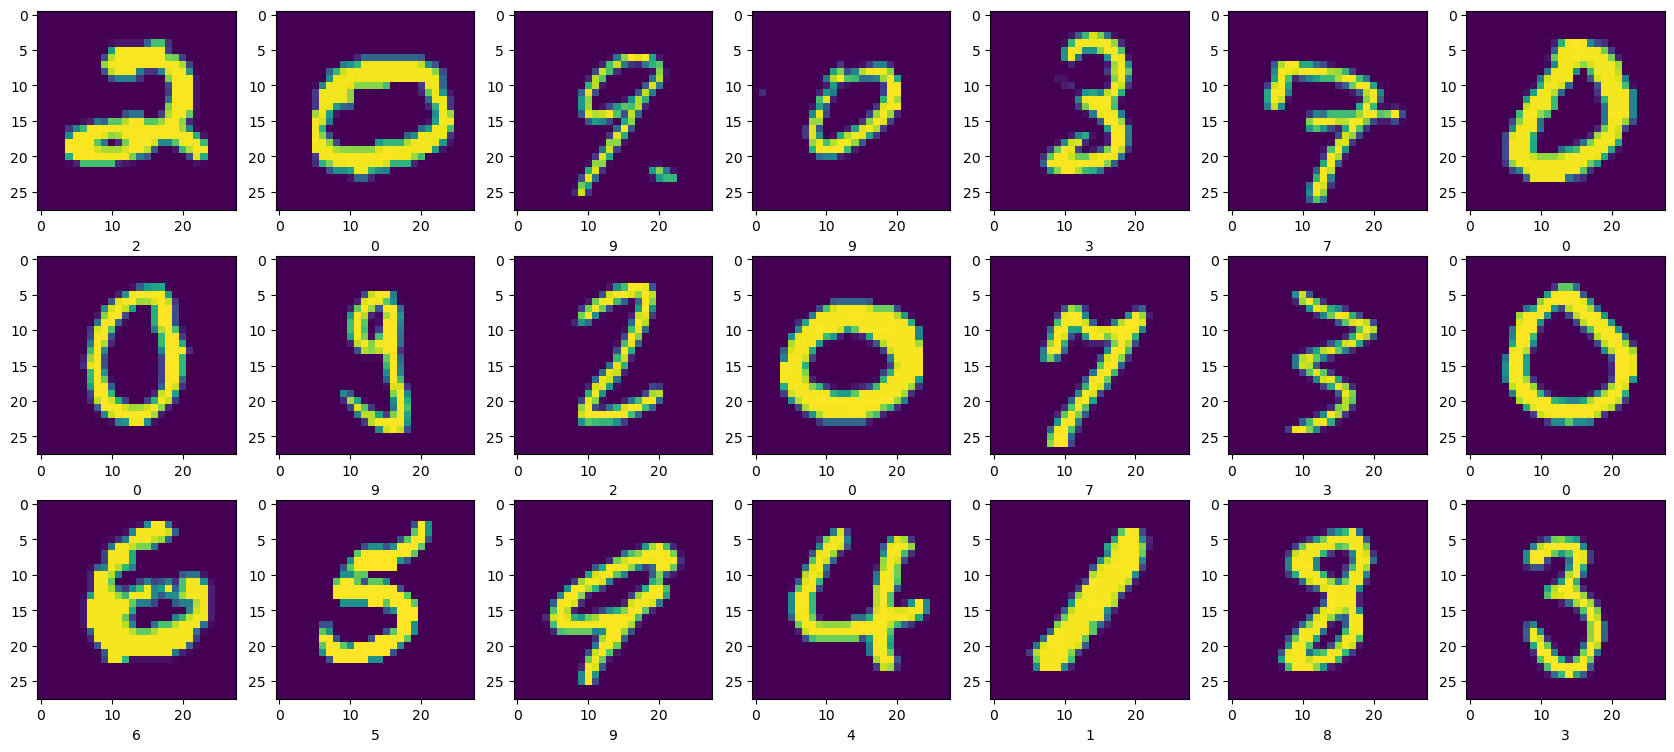

In [17]:
f,ax = plt.subplots(3, 7, figsize=(21,9))
for i in range(7):
    ax[0][i].imshow(X_test[i])
    ax[0][i].set_xlabel(test_preds[i])
    ax[1][i].imshow(X_test[i+100])
    ax[1][i].set_xlabel(test_preds[i+100])
    ax[2][i].imshow(X_test[i+500])
    ax[2][i].set_xlabel(test_preds[i+500])
    
plt.show()

In [18]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [19]:
sub.Label = test_preds

In [20]:
#sub.to_csv('submission.csv', index=False)